In [1]:
''' Project: Using a dataset of your choice, create a Jupyter Notebook or python script that demonstrates your 
understanding of python, pandas, and statistics (this weeks topic).

Submission Instructions: Please email a github repository link or zip file containing your code 
and dataset to daveturner81@gmail.com

‣ Requirements: 
‣ Import and clean data 
‣ Create calculated columns (e.g. dummy variables, new groupings) 
‣ Describe your data (statistics, visualizations) 
‣ Identify areas for further research 
‣ Bonus: Combine with a second dataset
'''

#imports
from sklearn import datasets
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


#import government 
df = pd.read_csv('14zpallagi.csv')
print list(df.columns.values)

['STATEFIPS', 'STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'PREP', 'N2', 'NUMDEP', 'TOTAL_VITA', 'VITA', 'TCE', 'A00100', 'N02650', 'A02650', 'N00200', 'A00200', 'N00300', 'A00300', 'N00600', 'A00600', 'N00650', 'A00650', 'N00700', 'A00700', 'N00900', 'A00900', 'N01000', 'A01000', 'N01400', 'A01400', 'N01700', 'A01700', 'SCHF', 'N02300', 'A02300', 'N02500', 'A02500', 'N26270', 'A26270', 'N02900', 'A02900', 'N03220', 'A03220', 'N03300', 'A03300', 'N03270', 'A03270', 'N03150', 'A03150', 'N03210', 'A03210', 'N03230', 'A03230', 'N03240', 'A03240', 'N04470', 'A04470', 'A00101', 'N18425', 'A18425', 'N18450', 'A18450', 'N18500', 'A18500', 'N18300', 'A18300', 'N19300', 'A19300', 'N19700', 'A19700', 'N04800', 'A04800', 'N05800', 'A05800', 'N09600', 'A09600', 'N05780', 'A05780', 'N07100', 'A07100', 'N07300', 'A07300', 'N07180', 'A07180', 'N07230', 'A07230', 'N07240', 'A07240', 'N07220', 'A07220', 'N07260', 'A07260', 'N09400', 'A09400', 'N85770', 'A85770', 'N85775', 'A85775', 

In [2]:
#new groupings
#create a group to see how much total income is from interest & dividends
df["intdiv"] = df['A00300'] + df['A00600'] 
print df["intdiv"]

0          137330.0
1          165521.0
2          192295.0
3          188957.0
4          509252.0
5         1055806.0
6             275.0
7             369.0
8             486.0
9             294.0
10            386.0
11            243.0
12            176.0
13            215.0
14            122.0
15             89.0
16             83.0
17              0.0
18             36.0
19             67.0
20             50.0
21             14.0
22             29.0
23              0.0
24            502.0
25            678.0
26            856.0
27            706.0
28           1808.0
29            796.0
            ...    
166640         19.0
166641          0.0
166642         34.0
166643          0.0
166644          0.0
166645          0.0
166646        259.0
166647        216.0
166648        404.0
166649        428.0
166650       1127.0
166651       1129.0
166652         67.0
166653        126.0
166654        222.0
166655         54.0
166656        264.0
166657       2813.0
166658         59.0


In [3]:
#create a group to see % of total income that is interest & dividends
df["intdivratio"] = df['intdiv']/df['A02650']
df["intdivratio"].fillna(value=0.0, inplace = True)
print df["intdivratio"]

0         0.012275
1         0.009280
2         0.011931
3         0.013101
4         0.018408
5         0.045758
6         0.013903
7         0.007661
8         0.008485
9         0.005341
10        0.005113
11        0.015073
12        0.009459
13        0.005760
14        0.004350
15        0.004638
16        0.003388
17        0.000000
18        0.006062
19        0.005723
20        0.004196
21        0.001253
22        0.001481
23        0.000000
24        0.009840
25        0.006888
26        0.007326
27        0.005696
28        0.008091
29        0.010914
            ...   
166640    0.032479
166641    0.000000
166642    0.015589
166643    0.000000
166644    0.000000
166645    0.000000
166646    0.055711
166647    0.019937
166648    0.025204
166649    0.026750
166650    0.042245
166651    0.038737
166652    0.020596
166653    0.016588
166654    0.023070
166655    0.007620
166656    0.018892
166657    0.113882
166658    0.114786
166659    0.000000
166660    0.156954
166661    0.

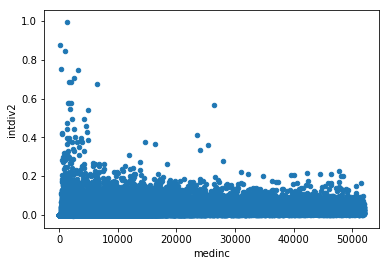

In [4]:
df['medinc'] = df.apply(lambda x: x['A00100'] if x['A00100'] < 52000 else 0.0, axis = 1) #create column for incomes less than US median
df['intdiv2'] = df.apply(lambda x: x['intdivratio'] if x['medinc'] > 0.0 else 0, axis = 1)
dfless = df.query(('zipcode != 0')) #cleans up main list to remove the top rows of totals
dfless.plot(kind = 'scatter', x='medinc', y = 'intdiv2') 
#scatterplot to show different interest+dividend percentages by income for those earning under median income



In [5]:
#dummies for each income bracket
pd.get_dummies(df['agi_stub'])



,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1
6,1,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


In [6]:
#stats
medincome = dfless['A02650'].median()
avgincome = dfless['A02650'].mean()
print "The median total income is: " + str(medincome)
print "The average total income is: " + str(avgincome)
df['dependents'] = df['NUMDEP']/df['N1'] #amount of dependents per return filed
dfless = df.query(('zipcode != 0')) #recopies to dfless to add dependents and remove top rows
dfless['dependents'].describe()



The median total income is: 14982.0
The average total income is: 59527.8221671


count    150371.000000
mean          0.690574
std           0.337387
min           0.000000
25%           0.483428
50%           0.695817
75%           0.891892
max           3.666667
Name: dependents, dtype: float64

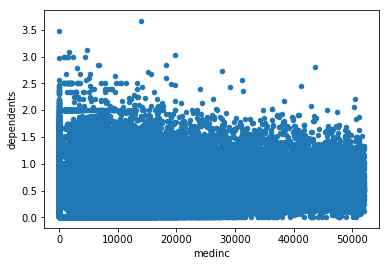

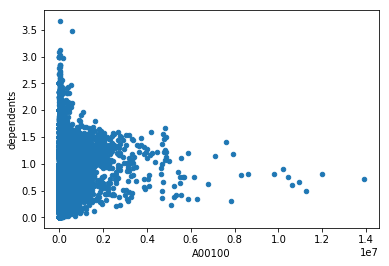

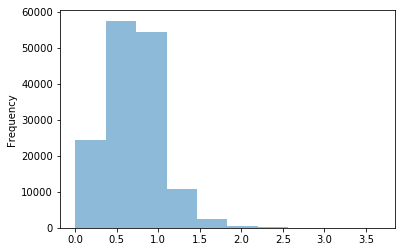

In [7]:
dfless.plot(kind = 'scatter', x='medinc', y = 'dependents') #plot avg dependents for incomes below median ($52K)
dfless.plot(kind = 'scatter', x='A00100', y = 'dependents') #plot avg dependents for all incomes
plt.figure()
dfless['dependents'].plot.hist(alpha=0.5)
plt.show()

In [8]:
df["percentpaid"] = df['A10300']/df['A02650'] #percentage of tax paid vs total income
#print df['percentpaid']
dfless = df.query(('zipcode != 0'))

#percentage taxes paid by each income range
dfless.groupby(['agi_stub'])['percentpaid'].mean()

agi_stub
1    0.033191
2    0.060575
3    0.084450
4    0.099563
5    0.137451
6    0.228086
Name: percentpaid, dtype: float64

In [9]:
dfless.groupby(['agi_stub'])['SCHF'].sum() #number of farm returns by income bracket

agi_stub
1    312830.0
2    387140.0
3    349330.0
4    219910.0
5    326470.0
6     69960.0
Name: SCHF, dtype: float64

In [10]:
#% of returns with home energy credits by income group (the most green group)
print (dfless.groupby(['agi_stub'])['N07260'].sum())/(dfless.groupby(['agi_stub'])['N1'].sum())

agi_stub
1    0.000623
2    0.014924
3    0.030459
4    0.035155
5    0.043216
6    0.027379
dtype: float64


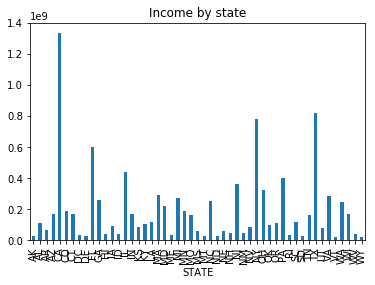

In [11]:
#total income by state
df3 = dfless.groupby(['STATE'])['A02650'].sum()
df3.plot(kind = "bar", title = "Income by state")

In [14]:
print "Potential for further research: \n -income tax data can be looked at further to look for abnormalities by state or by zip code by applying statistics to all the different credits received\n-income tax data can be combined with population data to find out what % of people are filing tax returns and could do further research into reasons of filing and not filing\n-tax data can be combined with welfare data to look for anomalies"

Potential for further research: 
 -income tax data can be looked at further to look for abnormalities by state or by zip code by applying statistics to all the different credits received
-income tax data can be combined with population data to find out what % of people are filing tax returns and could do further research into reasons of filing and not filing
-tax data can be combined with welfare data to look for anomalies
